In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('3D_spatial_network.txt')
data = data.drop(columns="serial")
data.head()

latitude  longitude   altitude
0  9.349849  56.740876  17.052772
1  9.350188  56.740679  17.614840
2  9.350549  56.740544  18.083536
3  9.350806  56.740484  18.279465
4  9.351053  56.740486  18.422974

In [3]:
X=data[["latitude","longitude"]].copy()
Y=data["altitude"].values.reshape(-1,1)
X.insert(0,'1s',1)
print(X)

        1s  latitude  longitude
0        1  9.349849  56.740876
1        1  9.350188  56.740679
2        1  9.350549  56.740544
3        1  9.350806  56.740484
4        1  9.351053  56.740486
...     ..       ...        ...
434869   1  9.936479  57.499686
434870   1  9.935696  57.499426
434871   1  9.935009  57.499282
434872   1  9.943479  57.495919
434873   1  9.943451  57.496270

[434874 rows x 3 columns]


In [82]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=24)

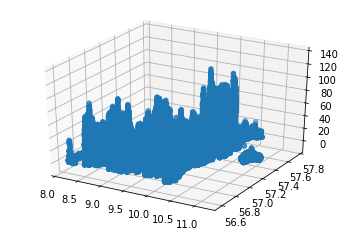

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.plot3D(data["latitude"], data["longitude"], data["altitude"], 'gray')
ax.scatter(data["latitude"], data["longitude"], data["altitude"], 'gray')

In [34]:
size=len(x_train)
learning_rate=1e-6
max_iters=10000

In [35]:
def calc_grad(w0,w1,w2):
    w=np.array([w0,w1,w2]).reshape(-1,1)
    dw0= np.sum(np.dot(X,w)-Y)/size
    dw1= np.sum(np.multiply((np.dot(X,w)-Y),X['latitude'].values.reshape(-1,1)))/size
    dw2= np.sum(np.multiply((np.dot(X,w)-Y),X['longitude'].values.reshape(-1,1)))/size
    
    return dw0,dw1,dw2

In [36]:
def gradient_descent(w0=0,w1=0,w2=0):
    for i in range(max_iters):
        dw0,dw1,dw2=calc_grad(w0,w1,w2)
        w0-=(learning_rate*dw0)
        w1-=(learning_rate*dw1)
        w2-=(learning_rate*dw2)
        if(i%20==0):
            print("The updated weights after iteration {} are w0={}, w1={}, w2={}".format(i,w0,w1,w2))

In [37]:
gradient_descent(650,6,0)

The updated weights after iteration 0 are w0=649.999313794388, w1=5.993320092372448, w2=-0.03917238091679062
The updated weights after iteration 20 are w0=649.9860629444358, w1=5.864329020507595, w2=-0.7956035928382811
The updated weights after iteration 40 are w0=649.973673298183, w1=5.743721534277349, w2=-1.5028725755388141
The updated weights after iteration 60 are w0=649.9620888839623, w1=5.630952764606831, w2=-2.164174498659243
The updated weights after iteration 80 are w0=649.9512573678379, w1=5.525513254752009, w2=-2.7824968702026904
The updated weights after iteration 100 are w0=649.9411298171807, w1=5.426926658768498, w2=-3.3606330329559135
The updated weights after iteration 120 are w0=649.9316604796086, w1=5.334747589562326, w2=-3.901194783746281
The updated weights after iteration 140 are w0=649.9228065762956, w1=5.248559606800952, w2=-4.406624172543397
The updated weights after iteration 160 are w0=649.914528108712, w1=5.167973335594744, w2=-4.879204534709154
The updated w

The updated weights after iteration 1500 are w0=649.7967500819672, w1=4.0215952514433, w2=-11.602622823442307
The updated weights after iteration 1520 are w0=649.7966642969111, w1=4.020762533026643, w2=-11.607519945717337
The updated weights after iteration 1540 are w0=649.7965840868256, w1=4.019984085431896, w2=-11.61209881807885
The updated weights after iteration 1560 are w0=649.7965090893807, w1=4.019256381468834, w2=-11.616380124341823
The updated weights after iteration 1580 are w0=649.7964389657948, w1=4.018576123187671, w2=-11.620383204031143
The updated weights after iteration 1600 are w0=649.7963733993043, w1=4.017940226980183, w2=-11.624126139750192
The updated weights after iteration 1620 are w0=649.7963120937318, w1=4.017345809649145, w2=-11.627625838871158
The updated weights after iteration 1640 are w0=649.7962547721509, w1=4.01679017538314, w2=-11.630898109916108
The updated weights after iteration 1660 are w0=649.7962011756325, w1=4.016270803577923, w2=-11.633957733973

The updated weights after iteration 2980 are w0=649.7954389315942, w1=4.009007330432566, w2=-11.677473512865383
The updated weights after iteration 3000 are w0=649.7954383315197, w1=4.0090038635422225, w2=-11.67750780960194
The updated weights after iteration 3020 are w0=649.7954377700431, w1=4.009000772376222, w2=-11.677539902953425
The updated weights after iteration 3040 are w0=649.7954372446561, w1=4.0089980325142935, w2=-11.677569936122866
The updated weights after iteration 3060 are w0=649.7954367530133, w1=4.008995621123298, w2=-11.677598043006201
The updated weights after iteration 3080 are w0=649.7954362929211, w1=4.008993516854076, w2=-11.677624348797131
The updated weights after iteration 3100 are w0=649.7954358623294, w1=4.008991699745007, w2=-11.677648970552742
The updated weights after iteration 3120 are w0=649.7954354593207, w1=4.00899015113181, w2=-11.677672017722294
The updated weights after iteration 3140 are w0=649.7954350821024, w1=4.008988853563255, w2=-11.67769359

The updated weights after iteration 4460 are w0=649.7954293993523, w1=4.009090215432282, w2=-11.678020724900762
The updated weights after iteration 4480 are w0=649.7954293890591, w1=4.009092488617609, w2=-11.678021353981613
The updated weights after iteration 4500 are w0=649.7954293790333, w1=4.009094764388128, w2=-11.678021967804725
The updated weights after iteration 4520 are w0=649.7954293692577, w1=4.009097042574766, w2=-11.678022567361563
The updated weights after iteration 4540 are w0=649.7954293597156, w1=4.009099323019435, w2=-11.678023153579138
The updated weights after iteration 4560 are w0=649.7954293503922, w1=4.0091016055743305, w2=-11.678023727324222
The updated weights after iteration 4580 are w0=649.7954293412731, w1=4.009103890101247, w2=-11.678024289407256
The updated weights after iteration 4600 are w0=649.7954293323454, w1=4.009106176470963, w2=-11.678024840586
The updated weights after iteration 4620 are w0=649.7954293235961, w1=4.009108464562661, w2=-11.6780253815

The updated weights after iteration 5940 are w0=649.7954288794317, w1=4.009260737687818, w2=-11.678053486666991
The updated weights after iteration 5960 are w0=649.7954288732309, w1=4.009263049422126, w2=-11.678053882448925
The updated weights after iteration 5980 are w0=649.795428867032, w1=4.009265361158227, w2=-11.678054278122474
The updated weights after iteration 6000 are w0=649.7954288608349, w1=4.009267672894952, w2=-11.678054673694504
The updated weights after iteration 6020 are w0=649.7954288546393, w1=4.009269984631206, w2=-11.678055069171439
The updated weights after iteration 6040 are w0=649.7954288484457, w1=4.009272296365965, w2=-11.678055464559275
The updated weights after iteration 6060 are w0=649.7954288422536, w1=4.009274608098277, w2=-11.678055859863626
The updated weights after iteration 6080 are w0=649.7954288360626, w1=4.009276919827241, w2=-11.678056255089736
The updated weights after iteration 6100 are w0=649.7954288298735, w1=4.009279231552021, w2=-11.678056650

The updated weights after iteration 7420 are w0=649.7954284225615, w1=4.009431778504493, w2=-11.678082671643178
The updated weights after iteration 7440 are w0=649.7954284163974, w1=4.009434089314254, w2=-11.678083065606858
The updated weights after iteration 7460 are w0=649.7954284102333, w1=4.009436400107932, w2=-11.678083459567043
The updated weights after iteration 7480 are w0=649.7954284040692, w1=4.009438710885517, w2=-11.678083853523784
The updated weights after iteration 7500 are w0=649.7954283979051, w1=4.009441021647001, w2=-11.678084247477122
The updated weights after iteration 7520 are w0=649.795428391741, w1=4.00944333239238, w2=-11.6780846414271
The updated weights after iteration 7540 are w0=649.7954283855769, w1=4.009445643121647, w2=-11.678085035373755
The updated weights after iteration 7560 are w0=649.7954283794139, w1=4.009447953834797, w2=-11.678085429317127
The updated weights after iteration 7580 are w0=649.7954283732521, w1=4.009450264531821, w2=-11.678085823257

The updated weights after iteration 8900 are w0=649.7954279667803, w1=4.009602734767519, w2=-11.678111816836063
The updated weights after iteration 8920 are w0=649.7954279606253, w1=4.009605044380059, w2=-11.67811221058424
The updated weights after iteration 8940 are w0=649.7954279544703, w1=4.009607353976399, w2=-11.678112604329652
The updated weights after iteration 8960 are w0=649.7954279483153, w1=4.009609663556541, w2=-11.678112998072296
The updated weights after iteration 8980 are w0=649.7954279421602, w1=4.009611973120483, w2=-11.678113391812174
The updated weights after iteration 9000 are w0=649.7954279360052, w1=4.009614282668226, w2=-11.678113785549288
The updated weights after iteration 9020 are w0=649.7954279298502, w1=4.009616592199771, w2=-11.678114179283638
The updated weights after iteration 9040 are w0=649.7954279236952, w1=4.0096189017151165, w2=-11.678114573015222
The updated weights after iteration 9060 are w0=649.7954279175422, w1=4.009621211214264, w2=-11.67811496

In [60]:
size=len(x_train)
learning_rate=1e-5
max_iters=1000000

In [61]:
def calc_sgd_grad(w0,w1,w2):
    i=np.random.randint(1,len(Y))
    dw0= ((w0*1) + (w1*X.at[i,'latitude']) + (w2*X.at[i,'longitude']))/size
    dw1= (((w0*1) + (w1*X.at[i,'latitude']) + (w2*X.at[i,'longitude']))*X.at[i,'latitude'])/size
    dw2= (((w0*1) + (w1*X.at[i,'latitude']) + (w2*X.at[i,'longitude']))*X.at[i,'longitude'])/size
    
    return dw0,dw1,dw2

In [62]:
def stochastic_gradient_descent(w0=0,w1=0,w2=0):
    for i in range(max_iters):
        dw0,dw1,dw2=calc_sgd_grad(w0,w1,w2)
        w0-=(learning_rate*dw0)
        w1-=(learning_rate*dw1)
        w2-=(learning_rate*dw2)
        if(i%20==0):
            print("The updated weights after iteration {} are w0={}, w1={}, w2={}".format(i,w0,w1,w2))

In [63]:
stochastic_gradient_descent(400,4,5)

The updated weights after iteration 0 are w0=399.9999999792749, w1=3.9999998075928507, w2=4.999998823269687
The updated weights after iteration 20 are w0=399.9999995629112, w1=3.999995748902632, w2=4.999975066560043
The updated weights after iteration 40 are w0=399.99999914644, w1=3.9999916922927707, w2=4.999951285555318
The updated weights after iteration 60 are w0=399.99999872993334, w1=3.9999876231456075, w2=4.999927507153524
The updated weights after iteration 80 are w0=399.9999983137559, w1=3.999983598582501, w2=4.999903761487113
The updated weights after iteration 100 are w0=399.9999978978083, w1=3.9999795882623594, w2=4.999880052342044
The updated weights after iteration 120 are w0=399.9999974815682, w1=3.9999755810984103, w2=4.999856279946714
The updated weights after iteration 140 are w0=399.99999706515445, w1=3.999971535699249, w2=4.999832501273266
The updated weights after iteration 160 are w0=399.9999966487977, w1=3.999967475484761, w2=4.999808746170246
The updated weights 

The updated weights after iteration 22140 are w0=399.99953950478067, w1=3.995516773671148, w2=4.973713264810404
The updated weights after iteration 22160 are w0=399.99953908832106, w1=3.9955126157240226, w2=4.973689438146368
The updated weights after iteration 22180 are w0=399.9995386725411, w1=3.9955085523725806, w2=4.973665678389385
The updated weights after iteration 22200 are w0=399.9995382571378, w1=3.995504545564292, w2=4.973641952127526
The updated weights after iteration 22220 are w0=399.99953784173175, w1=3.9955005087240854, w2=4.9736182500904125
The updated weights after iteration 22240 are w0=399.9995374261562, w1=3.9954964476720316, w2=4.9735945316887715
The updated weights after iteration 22260 are w0=399.9995370110577, w1=3.9954924615262795, w2=4.973570853220169
The updated weights after iteration 22280 are w0=399.9995365945569, w1=3.9954882741304805, w2=4.973547041420535
The updated weights after iteration 22300 are w0=399.9995361786189, w1=3.9954841877528837, w2=4.97352

The updated weights after iteration 41220 are w0=399.99914342501467, w1=3.9916567165007217, w2=4.951101563346343
The updated weights after iteration 41240 are w0=399.9991430100306, w1=3.9916526868211775, w2=4.951077832994729
The updated weights after iteration 41260 are w0=399.99914259516265, w1=3.991648627507946, w2=4.95105415033904
The updated weights after iteration 41280 are w0=399.99914218055255, w1=3.9916446280073847, w2=4.951030474647762
The updated weights after iteration 41300 are w0=399.999141766721, w1=3.991640700368312, w2=4.951006904375212
The updated weights after iteration 41320 are w0=399.9991413522293, w1=3.99163671808443, w2=4.9509832389027455
The updated weights after iteration 41340 are w0=399.9991409372831, w1=3.9916326764042744, w2=4.950959525635502
The updated weights after iteration 41360 are w0=399.9991405234762, w1=3.991628751681285, w2=4.950935958214997
The updated weights after iteration 41380 are w0=399.9991401078558, w1=3.9916245895279077, w2=4.95091219963

The updated weights after iteration 46120 are w0=399.99904182872564, w1=3.990666942534042, w2=4.945301960676516
The updated weights after iteration 46140 are w0=399.9990414143446, w1=3.9906629368753808, w2=4.945278309751488
The updated weights after iteration 46160 are w0=399.9990409995282, w1=3.990658888304164, w2=4.945254601309576
The updated weights after iteration 46180 are w0=399.999040585193, w1=3.990654865775936, w2=4.945230973840256
The updated weights after iteration 46200 are w0=399.9990401703055, w1=3.990650799387386, w2=4.9452072646828285
The updated weights after iteration 46220 are w0=399.9990397560958, w1=3.9906468056412803, w2=4.945183639818213
The updated weights after iteration 46240 are w0=399.9990393418879, w1=3.9906428275697516, w2=4.9451600023701685
The updated weights after iteration 46260 are w0=399.9990389268959, w1=3.9906387299312387, w2=4.945136296320869
The updated weights after iteration 46280 are w0=399.9990385122962, w1=3.990634713191359, w2=4.94511260728

The updated weights after iteration 54440 are w0=399.9988694506091, w1=3.988990352367302, w2=4.935462245780543
The updated weights after iteration 54460 are w0=399.9988690360037, w1=3.988986235146261, w2=4.935438589732648
The updated weights after iteration 54480 are w0=399.9988686219259, w1=3.988982244055363, w2=4.935414941968364
The updated weights after iteration 54500 are w0=399.998868207563, w1=3.9889781884737827, w2=4.935391286804031
The updated weights after iteration 54520 are w0=399.9988677942889, w1=3.988974266676207, w2=4.935367752398478
The updated weights after iteration 54540 are w0=399.998867380064, w1=3.9889702722101905, w2=4.9353440756199625
The updated weights after iteration 54560 are w0=399.99886696539664, w1=3.9889662338592506, w2=4.935320341405554
The updated weights after iteration 54580 are w0=399.9988665505258, w1=3.9889621517199436, w2=4.9352965994085265
The updated weights after iteration 54600 are w0=399.99886613724937, w1=3.9889582727508412, w2=4.9352730294

The updated weights after iteration 59840 are w0=399.9987576436895, w1=3.987902143987557, w2=4.929080544817765
The updated weights after iteration 59860 are w0=399.9987572296413, w1=3.9878980836161846, w2=4.929056928718945
The updated weights after iteration 59880 are w0=399.9987568158305, w1=3.9878940759502366, w2=4.929033319287422
The updated weights after iteration 59900 are w0=399.99875640143676, w1=3.9878899790848203, w2=4.929009658988111
The updated weights after iteration 59920 are w0=399.99875598789, w1=3.98788602914387, w2=4.928986058287059
The updated weights after iteration 59940 are w0=399.99875557344666, w1=3.987881952160735, w2=4.9289623716087085
The updated weights after iteration 59960 are w0=399.99875515913016, w1=3.9878778874683034, w2=4.9289387012134664
The updated weights after iteration 59980 are w0=399.9987547443568, w1=3.987873762038913, w2=4.928914983775859
The updated weights after iteration 60000 are w0=399.99875433042297, w1=3.9878697103873133, w2=4.928891383

The updated weights after iteration 72100 are w0=399.99850400720953, w1=3.9854332132181276, w2=4.91460241780977
The updated weights after iteration 72120 are w0=399.99850359281726, w1=3.985429054838623, w2=4.914578735934019
The updated weights after iteration 72140 are w0=399.9985031785845, w1=3.9854249637936054, w2=4.914555033738439
The updated weights after iteration 72160 are w0=399.9985027653463, w1=3.985420934371658, w2=4.914531492026946
The updated weights after iteration 72180 are w0=399.9985023522313, w1=3.9854169424141537, w2=4.9145079454972755
The updated weights after iteration 72200 are w0=399.99850193906104, w1=3.985412968078783, w2=4.914484372552409
The updated weights after iteration 72220 are w0=399.9985015251034, w1=3.9854088873504896, w2=4.914460719254675
The updated weights after iteration 72240 are w0=399.998501111452, w1=3.985404836898589, w2=4.914437106397869
The updated weights after iteration 72260 are w0=399.99850069781525, w1=3.9854007926168706, w2=4.914413491

The updated weights after iteration 82360 are w0=399.9982919826186, w1=3.9833697657811276, w2=4.902500012336371
The updated weights after iteration 82380 are w0=399.9982915694229, w1=3.983365729022603, w2=4.902476425050067
The updated weights after iteration 82400 are w0=399.9982911567196, w1=3.983361775589562, w2=4.9024528742547995
The updated weights after iteration 82420 are w0=399.9982907431657, w1=3.983357682064812, w2=4.90242925788552
The updated weights after iteration 82440 are w0=399.99829033024025, w1=3.9833537066348117, w2=4.902405677505921
The updated weights after iteration 82460 are w0=399.99828991634445, w1=3.983349598921436, w2=4.902381999972434
The updated weights after iteration 82480 are w0=399.9982895028864, w1=3.9833454857278148, w2=4.902358419336903
The updated weights after iteration 82500 are w0=399.99828908925366, w1=3.983341415737545, w2=4.902334766309687
The updated weights after iteration 82520 are w0=399.9982886764065, w1=3.9833374264896753, w2=4.9023112141

The updated weights after iteration 89480 are w0=399.9981449674812, w1=3.9819392373982176, w2=4.89410782580187
The updated weights after iteration 89500 are w0=399.99814455480697, w1=3.981935249721631, w2=4.894084267519263
The updated weights after iteration 89520 are w0=399.99814414214774, w1=3.9819312894902996, w2=4.89406068992648
The updated weights after iteration 89540 are w0=399.9981437290419, w1=3.9819272402401107, w2=4.894037090622565
The updated weights after iteration 89560 are w0=399.998143317436, w1=3.9819234122821787, w2=4.894013627887196
The updated weights after iteration 89580 are w0=399.99814290552473, w1=3.9819195437766033, w2=4.893990133145478
The updated weights after iteration 89600 are w0=399.99814249345656, w1=3.9819156165943332, w2=4.893966653237809
The updated weights after iteration 89620 are w0=399.99814208049787, w1=3.9819115717733324, w2=4.8939430806472215
The updated weights after iteration 89640 are w0=399.9981416673315, w1=3.9819075184443813, w2=4.893919

The updated weights after iteration 102060 are w0=399.99788546324396, w1=3.979414605664712, w2=4.87929441283121
The updated weights after iteration 102080 are w0=399.9978850509352, w1=3.9794106138524965, w2=4.87927086203483
The updated weights after iteration 102100 are w0=399.9978846383981, w1=3.979406537019772, w2=4.879247332392589
The updated weights after iteration 102120 are w0=399.9978842252718, w1=3.979402422374237, w2=4.8792237085452275
The updated weights after iteration 102140 are w0=399.99788381383104, w1=3.9793985103334535, w2=4.879200276371982
The updated weights after iteration 102160 are w0=399.9978834020245, w1=3.979394583527557, w2=4.879176778172247
The updated weights after iteration 102180 are w0=399.99788298956815, w1=3.979390587843929, w2=4.879153197974222
The updated weights after iteration 102200 are w0=399.9978825770262, w1=3.9793865320058366, w2=4.879129649548946
The updated weights after iteration 102220 are w0=399.99788216499184, w1=3.9793825500279416, w2=4.8

The updated weights after iteration 124320 are w0=399.99742702922566, w1=3.9749520443174204, w2=4.853124892541892
The updated weights after iteration 124340 are w0=399.99742661805095, w1=3.9749480954499354, w2=4.853101416707342
The updated weights after iteration 124360 are w0=399.9974262067618, w1=3.974944115781014, w2=4.853077942398065
The updated weights after iteration 124380 are w0=399.9974257952632, w1=3.9749401412401637, w2=4.853054418633341
The updated weights after iteration 124400 are w0=399.99742538361204, w1=3.9749360987680324, w2=4.853030918165058
The updated weights after iteration 124420 are w0=399.9974249720545, w1=3.9749320617936905, w2=4.853007433535457
The updated weights after iteration 124440 are w0=399.99742455989735, w1=3.9749279777004847, w2=4.852983859140686
The updated weights after iteration 124460 are w0=399.99742414841603, w1=3.974923951728317, w2=4.852960381377174
The updated weights after iteration 124480 are w0=399.99742373667885, w1=3.9749199295084363, 

The updated weights after iteration 141000 are w0=399.9970841762982, w1=3.9716171614928095, w2=4.833554046337834
The updated weights after iteration 141020 are w0=399.99708376587455, w1=3.971613207526158, w2=4.833530637439044
The updated weights after iteration 141040 are w0=399.99708335514794, w1=3.971609186006779, w2=4.833507219696379
The updated weights after iteration 141060 are w0=399.99708294480587, w1=3.971605246913999, w2=4.833483815961493
The updated weights after iteration 141080 are w0=399.9970825339824, w1=3.9716012302261485, w2=4.833460373368119
The updated weights after iteration 141100 are w0=399.9970821232002, w1=3.9715972178590664, w2=4.8334369352355955
The updated weights after iteration 141120 are w0=399.99708171156396, w1=3.9715930866330567, w2=4.8334134127329555
The updated weights after iteration 141140 are w0=399.9970813004086, w1=3.9715890677569137, w2=4.833389899988128
The updated weights after iteration 141160 are w0=399.9970808896073, w1=3.9715850741010668, w

The updated weights after iteration 149860 are w0=399.9969022747019, w1=3.9698465951855946, w2=4.823170094590423
The updated weights after iteration 149880 are w0=399.9969018633342, w1=3.9698424886162873, w2=4.823146558051906
The updated weights after iteration 149900 are w0=399.9969014525817, w1=3.969838410069878, w2=4.823123129656023
The updated weights after iteration 149920 are w0=399.9969010424298, w1=3.9698344766931832, w2=4.823099709615191
The updated weights after iteration 149940 are w0=399.9969006331912, w1=3.969830661228664, w2=4.823076386866076
The updated weights after iteration 149960 are w0=399.9969002223241, w1=3.9698266188739386, w2=4.823052902802103
The updated weights after iteration 149980 are w0=399.9968998110945, w1=3.96982249958911, w2=4.823029405151323
The updated weights after iteration 150000 are w0=399.99689940095675, w1=3.9698185551507956, w2=4.823005996164243
The updated weights after iteration 150020 are w0=399.996898990584, w1=3.9698145805457905, w2=4.822

The updated weights after iteration 159320 are w0=399.99670822224454, w1=3.9679569384138644, w2=4.81209259380816
The updated weights after iteration 159340 are w0=399.9967078127109, w1=3.9679530553921993, w2=4.8120692078017475
The updated weights after iteration 159360 are w0=399.99670740296204, w1=3.9679491157270332, w2=4.812045823346791
The updated weights after iteration 159380 are w0=399.9967069927466, w1=3.9679451135813855, w2=4.812022391089634
The updated weights after iteration 159400 are w0=399.9967065822787, w1=3.9679410689764607, w2=4.811998939696801
The updated weights after iteration 159420 are w0=399.9967061726952, w1=3.9679371386290656, w2=4.811975582593772
The updated weights after iteration 159440 are w0=399.99670576293323, w1=3.9679331847745467, w2=4.811952206342497
The updated weights after iteration 159460 are w0=399.9967053529465, w1=3.967929191679993, w2=4.811928814606221
The updated weights after iteration 159480 are w0=399.9967049435535, w1=3.9679252806211336, w2

The updated weights after iteration 172880 are w0=399.99643037921805, w1=3.9652522099690324, w2=4.79623178756747
The updated weights after iteration 172900 are w0=399.9964299691071, w1=3.9652481623210716, w2=4.796208335515009
The updated weights after iteration 172920 are w0=399.99642956068226, w1=3.9652443153492305, w2=4.796185077538632
The updated weights after iteration 172940 are w0=399.99642915097047, w1=3.9652402834309575, w2=4.7961616978026305
The updated weights after iteration 172960 are w0=399.9964287420713, w1=3.9652363874156875, w2=4.7961383790461305
The updated weights after iteration 172980 are w0=399.9964283331557, w1=3.9652324589896732, w2=4.796115083227772
The updated weights after iteration 173000 are w0=399.996427923544, w1=3.9652284415011825, w2=4.79609171241969
The updated weights after iteration 173020 are w0=399.99642751417383, w1=3.9652244308415057, w2=4.796068387771253
The updated weights after iteration 173040 are w0=399.9964271039438, w1=3.965220361233022, w2

The updated weights after iteration 182000 are w0=399.99624372289617, w1=3.963435747611603, w2=4.785577019803401
The updated weights after iteration 182020 are w0=399.99624331385223, w1=3.9634318001555937, w2=4.785553659108712
The updated weights after iteration 182040 are w0=399.9962429049608, w1=3.9634278493951456, w2=4.785530333783153
The updated weights after iteration 182060 are w0=399.9962424959687, w1=3.963423869815899, w2=4.785507011470587
The updated weights after iteration 182080 are w0=399.9962420867509, w1=3.9634198896860497, w2=4.785483640713386
The updated weights after iteration 182100 are w0=399.9962416775062, w1=3.963415896144588, w2=4.7854602751541915
The updated weights after iteration 182120 are w0=399.99624126844895, w1=3.9634119355423447, w2=4.785436922171198
The updated weights after iteration 182140 are w0=399.9962408590799, w1=3.9634079506888655, w2=4.785413521912092
The updated weights after iteration 182160 are w0=399.9962404494697, w1=3.9634039162739136, w2=

The updated weights after iteration 202000 are w0=399.9958349584533, w1=3.959457309226228, w2=4.762243565590906
The updated weights after iteration 202020 are w0=399.9958345493889, w1=3.959453250969667, w2=4.76222017585981
The updated weights after iteration 202040 are w0=399.9958341405188, w1=3.959449203520954, w2=4.7621968185409544
The updated weights after iteration 202060 are w0=399.9958337322155, w1=3.9594452255565096, w2=4.762173523687177
The updated weights after iteration 202080 are w0=399.9958333234012, w1=3.9594411752066043, w2=4.762150180320581
The updated weights after iteration 202100 are w0=399.9958329147243, w1=3.959437195872866, w2=4.762126807126596
The updated weights after iteration 202120 are w0=399.9958325064709, w1=3.959433257276958, w2=4.762103490817483
The updated weights after iteration 202140 are w0=399.9958320983101, w1=3.9594293046226468, w2=4.762080206055351
The updated weights after iteration 202160 are w0=399.995831690103, w1=3.959425344863207, w2=4.762056

The updated weights after iteration 231980 are w0=399.99522367253275, w1=3.953505891625085, w2=4.727347788704617
The updated weights after iteration 232000 are w0=399.99522326478586, w1=3.9535018554394386, w2=4.727324487118564
The updated weights after iteration 232020 are w0=399.9952228571746, w1=3.953497839755517, w2=4.727301197128015
The updated weights after iteration 232040 are w0=399.99522245065697, w1=3.9534939690155313, w2=4.727278020491146
The updated weights after iteration 232060 are w0=399.9952220435528, w1=3.9534900197120653, w2=4.7272547839469246
The updated weights after iteration 232080 are w0=399.9952216362697, w1=3.953486056408858, w2=4.72723152041799
The updated weights after iteration 232100 are w0=399.99522122902926, w1=3.953482067225103, w2=4.727208287587948
The updated weights after iteration 232120 are w0=399.9952208215764, w1=3.953478097323123, w2=4.727184992271111
The updated weights after iteration 232140 are w0=399.99522041473676, w1=3.953474211488324, w2=4.

The updated weights after iteration 250460 are w0=399.9948477687344, w1=3.949847917127472, w2=4.705890550761889
The updated weights after iteration 250480 are w0=399.99484736243693, w1=3.949843960405146, w2=4.705867385684005
The updated weights after iteration 250500 are w0=399.9948469554841, w1=3.9498399239859627, w2=4.705844146265756
The updated weights after iteration 250520 are w0=399.99484654844827, w1=3.94983591307592, w2=4.705820867010319
The updated weights after iteration 250540 are w0=399.9948461431038, w1=3.9498321316435314, w2=4.705797758571276
The updated weights after iteration 250560 are w0=399.9948457374148, w1=3.9498282908562286, w2=4.705774625646798
The updated weights after iteration 250580 are w0=399.99484533098564, w1=3.9498243326061386, w2=4.705751432975264
The updated weights after iteration 250600 are w0=399.9948449250285, w1=3.9498204499475715, w2=4.705728277963942
The updated weights after iteration 250620 are w0=399.99484451825055, w1=3.949816483178513, w2=4.

The updated weights after iteration 266360 are w0=399.9945248710197, w1=3.946705379152789, w2=4.687457866103281
The updated weights after iteration 266380 are w0=399.99452446467234, w1=3.9467013457074165, w2=4.687434661394639
The updated weights after iteration 266400 are w0=399.9945240591469, w1=3.9466974192645243, w2=4.687411543970579
The updated weights after iteration 266420 are w0=399.99452365297634, w1=3.946693447499699, w2=4.687388324565201
The updated weights after iteration 266440 are w0=399.99452324692373, w1=3.946689471403634, w2=4.687365135113659
The updated weights after iteration 266460 are w0=399.99452284047186, w1=3.9466854458428453, w2=4.68734189949888
The updated weights after iteration 266480 are w0=399.9945224341679, w1=3.946681455034817, w2=4.687318667051469
The updated weights after iteration 266500 are w0=399.99452202783624, w1=3.9466774507294637, w2=4.6872954398770235
The updated weights after iteration 266520 are w0=399.994521621208, w1=3.9466734027798687, w2=4

The updated weights after iteration 271960 are w0=399.9944112542027, w1=3.945598188134029, w2=4.680971784158388
The updated weights after iteration 271980 are w0=399.99441084912786, w1=3.9455943384336893, w2=4.680948665768948
The updated weights after iteration 272000 are w0=399.9944104425352, w1=3.9455902821344, w2=4.680925393702898
The updated weights after iteration 272020 are w0=399.99441003687934, w1=3.9455863700239884, w2=4.6809022020191335
The updated weights after iteration 272040 are w0=399.99440963070884, w1=3.94558231934233, w2=4.68087901660229
The updated weights after iteration 272060 are w0=399.9944092249055, w1=3.9455783517942877, w2=4.6808558388061465
The updated weights after iteration 272080 are w0=399.99440881898624, w1=3.9455743527330265, w2=4.680832664122614
The updated weights after iteration 272100 are w0=399.9944084128316, w1=3.94557033082308, w2=4.680809457276838
The updated weights after iteration 272120 are w0=399.9944080069811, w1=3.9455663844979467, w2=4.68

The updated weights after iteration 311940 are w0=399.9936019415239, w1=3.9377182434399143, w2=4.634772079505805
The updated weights after iteration 311960 are w0=399.99360153783556, w1=3.937714376233823, w2=4.634749039568559
The updated weights after iteration 311980 are w0=399.99360113401144, w1=3.93771050911706, w2=4.634725970221062
The updated weights after iteration 312000 are w0=399.99360073017704, w1=3.9377066339501994, w2=4.634702906052844
The updated weights after iteration 312020 are w0=399.9936003261638, w1=3.9377026928298355, w2=4.634679859421943
The updated weights after iteration 312040 are w0=399.9935999219052, w1=3.9376987276673674, w2=4.634656778747554
The updated weights after iteration 312060 are w0=399.99359951788296, w1=3.937694772925762, w2=4.634633741361255
The updated weights after iteration 312080 are w0=399.99359911377616, w1=3.937690845042754, w2=4.634610662669733
The updated weights after iteration 312100 are w0=399.9935987103508, w1=3.937687034939101, w2=4.

The updated weights after iteration 341940 are w0=399.99299669883675, w1=3.931824427779388, w2=4.600222428827097
The updated weights after iteration 341960 are w0=399.9929962964398, w1=3.93182057317084, w2=4.600199482239327
The updated weights after iteration 341980 are w0=399.992995894076, w1=3.931816738461986, w2=4.600176525544413
The updated weights after iteration 342000 are w0=399.99299549151533, w1=3.9318129227400593, w2=4.60015350945723
The updated weights after iteration 342020 are w0=399.99299508809014, w1=3.931808907635267, w2=4.600130476114654
The updated weights after iteration 342040 are w0=399.9929946855404, w1=3.9318049995459123, w2=4.600107542392811
The updated weights after iteration 342060 are w0=399.9929942831254, w1=3.931801132992836, w2=4.600084601451943
The updated weights after iteration 342080 are w0=399.9929938800528, w1=3.931797199930157, w2=4.6000615742240765
The updated weights after iteration 342100 are w0=399.99299347721876, w1=3.931793281886665, w2=4.6000

The updated weights after iteration 381920 are w0=399.9921928234945, w1=3.923998372847242, w2=4.554331538315964
The updated weights after iteration 381940 are w0=399.99219242151764, w1=3.9239943729046876, w2=4.554308571403229
The updated weights after iteration 381960 are w0=399.9921920201486, w1=3.9239904673612958, w2=4.554285656341305
The updated weights after iteration 381980 are w0=399.9921916190236, w1=3.9239865904395237, w2=4.554262769433544
The updated weights after iteration 382000 are w0=399.99219121730823, w1=3.9239826308787804, w2=4.5542398243921784
The updated weights after iteration 382020 are w0=399.99219081558596, w1=3.9239786852807215, w2=4.554216865583998
The updated weights after iteration 382040 are w0=399.99219041397896, w1=3.9239747579559676, w2=4.554193915919895
The updated weights after iteration 382060 are w0=399.99219001259223, w1=3.92397086661439, w2=4.554170983330714
The updated weights after iteration 382080 are w0=399.9921896120189, w1=3.9239670526266233, w

The updated weights after iteration 420120 are w0=399.99142762239916, w1=3.9165473831137603, w2=4.510648829819489
The updated weights after iteration 420140 are w0=399.9914272224876, w1=3.9165434916668405, w2=4.510625995258731
The updated weights after iteration 420160 are w0=399.9914268236052, w1=3.9165397407796676, w2=4.510603263644943
The updated weights after iteration 420180 are w0=399.99142642375267, w1=3.916535825667146, w2=4.510580462300996
The updated weights after iteration 420200 are w0=399.9914260232459, w1=3.9165318409697836, w2=4.510557577009541
The updated weights after iteration 420220 are w0=399.99142562355496, w1=3.916527970732163, w2=4.510534772097251
The updated weights after iteration 420240 are w0=399.99142522280215, w1=3.9165239228548945, w2=4.51051188768454
The updated weights after iteration 420260 are w0=399.9914248223721, w1=3.916519970929937, w2=4.51048899064231
The updated weights after iteration 420280 are w0=399.9914244226067, w1=3.9165160914233925, w2=4.

The updated weights after iteration 424980 are w0=399.99133046782634, w1=3.915601338573106, w2=4.50510204604652
The updated weights after iteration 425000 are w0=399.99133006830033, w1=3.9155974461261605, w2=4.505079267718031
The updated weights after iteration 425020 are w0=399.99132966919734, w1=3.915593648292291, w2=4.505056499962925
The updated weights after iteration 425040 are w0=399.99132926942286, w1=3.915589743742549, w2=4.505033677068404
The updated weights after iteration 425060 are w0=399.9913288694923, w1=3.9155858238277435, w2=4.505010832852975
The updated weights after iteration 425080 are w0=399.99132846930365, w1=3.9155818475922284, w2=4.504987981924325
The updated weights after iteration 425100 are w0=399.9913280697173, w1=3.9155779358045857, w2=4.504965206995987
The updated weights after iteration 425120 are w0=399.99132767004295, w1=3.915574016050183, w2=4.504942419513905
The updated weights after iteration 425140 are w0=399.99132727078114, w1=3.9155701938933762, w2

The updated weights after iteration 433340 are w0=399.9911634658751, w1=3.9139758160349003, w2=4.4955690042067635
The updated weights after iteration 433360 are w0=399.991163066538, w1=3.9139719335500196, w2=4.495546209245594
The updated weights after iteration 433380 are w0=399.9911626671534, w1=3.913968080605273, w2=4.495523377172998
The updated weights after iteration 433400 are w0=399.9911622672565, w1=3.9139640813912906, w2=4.495500560718091
The updated weights after iteration 433420 are w0=399.9911618679551, w1=3.9139602318818962, w2=4.495477744561104
The updated weights after iteration 433440 are w0=399.9911614683957, w1=3.9139563291814894, w2=4.495454917643685
The updated weights after iteration 433460 are w0=399.9911610689561, w1=3.9139524542191273, w2=4.495432093413954
The updated weights after iteration 433480 are w0=399.99116066957606, w1=3.9139485640254756, w2=4.495409294613206
The updated weights after iteration 433500 are w0=399.9911602698191, w1=3.9139446140651413, w2=4

The updated weights after iteration 445280 are w0=399.99092517713706, w1=3.9116563927345407, w2=4.481965942221121
The updated weights after iteration 445300 are w0=399.990924778589, w1=3.911652546787512, w2=4.481943218206453
The updated weights after iteration 445320 are w0=399.99092437909997, w1=3.9116485625699045, w2=4.481920407339674
The updated weights after iteration 445340 are w0=399.99092398036186, w1=3.911644709110567, w2=4.48189764723176
The updated weights after iteration 445360 are w0=399.9909235810438, w1=3.9116407856240345, w2=4.481874821363813
The updated weights after iteration 445380 are w0=399.9909231818285, w1=3.9116368507322634, w2=4.4818520273190865
The updated weights after iteration 445400 are w0=399.99092278265914, w1=3.9116329414253603, w2=4.481829220944502
The updated weights after iteration 445420 are w0=399.99092238439505, w1=3.9116291197922406, w2=4.481806537250044
The updated weights after iteration 445440 are w0=399.9909219847912, w1=3.9116251528448593, w2

The updated weights after iteration 450560 are w0=399.99081989672453, w1=3.9106323574897814, w2=4.475956155591509
The updated weights after iteration 450580 are w0=399.9908194976228, w1=3.91062841202599, w2=4.475933365465475
The updated weights after iteration 450600 are w0=399.9908190989141, w1=3.910624516706743, w2=4.475910617274515
The updated weights after iteration 450620 are w0=399.990818700061, w1=3.9106206105711854, w2=4.475887846886937
The updated weights after iteration 450640 are w0=399.9908183009693, w1=3.9106166802341447, w2=4.475865044124901
The updated weights after iteration 450660 are w0=399.99081790226063, w1=3.9106128119928503, w2=4.475842272512437
The updated weights after iteration 450680 are w0=399.99081750396925, w1=3.9106089908962205, w2=4.475819550785332
The updated weights after iteration 450700 are w0=399.99081710545624, w1=3.9106051140971676, w2=4.475796829642097
The updated weights after iteration 450720 are w0=399.99081670697126, w1=3.910601302787709, w2=4

The updated weights after iteration 456000 are w0=399.9907114817675, w1=3.90957801848574, w2=4.469767225604628
The updated weights after iteration 456020 are w0=399.99071108335824, w1=3.9095741297070954, w2=4.469744505274542
The updated weights after iteration 456040 are w0=399.99071068492526, w1=3.909570281309147, w2=4.469721744542817
The updated weights after iteration 456060 are w0=399.99071028612974, w1=3.9095663760025277, w2=4.4696989535454374
The updated weights after iteration 456080 are w0=399.9907098876139, w1=3.9095625423257325, w2=4.469676160910048
The updated weights after iteration 456100 are w0=399.99070948889755, w1=3.909558622098002, w2=4.469653400182181
The updated weights after iteration 456120 are w0=399.990709090164, w1=3.9095547599858893, w2=4.469630584489891
The updated weights after iteration 456140 are w0=399.9907086913004, w1=3.9095508289822054, w2=4.469607800662876
The updated weights after iteration 456160 are w0=399.9907082926809, w1=3.9095469382798513, w2=4

The updated weights after iteration 463200 are w0=399.99056807533736, w1=3.9081824996383725, w2=4.461581049223149
The updated weights after iteration 463220 are w0=399.9905676775495, w1=3.9081786300110073, w2=4.461558406984588
The updated weights after iteration 463240 are w0=399.99056727926006, w1=3.9081747523008024, w2=4.461535660938146
The updated weights after iteration 463260 are w0=399.9905668806411, w1=3.908170842045096, w2=4.461512870170428
The updated weights after iteration 463280 are w0=399.9905664828006, w1=3.908167047789088, w2=4.4614901496243045
The updated weights after iteration 463300 are w0=399.99056608448484, w1=3.9081631795283047, w2=4.461467388932439
The updated weights after iteration 463320 are w0=399.9905656866629, w1=3.9081593184851733, w2=4.461444730767649
The updated weights after iteration 463340 are w0=399.99056528890173, w1=3.9081555322036534, w2=4.4614220205374995
The updated weights after iteration 463360 are w0=399.99056489048644, w1=3.9081516165323347,

The updated weights after iteration 468700 are w0=399.99045859252846, w1=3.907116444346913, w2=4.455331428158027
The updated weights after iteration 468720 are w0=399.99045819413584, w1=3.9071125118668686, w2=4.455308674568589
The updated weights after iteration 468740 are w0=399.9904577968185, w1=3.907108748214325, w2=4.455286010293335
The updated weights after iteration 468760 are w0=399.99045739855677, w1=3.907104868989239, w2=4.455263238944126
The updated weights after iteration 468780 are w0=399.9904570001302, w1=3.9071009239752663, w2=4.455240488656625
The updated weights after iteration 468800 are w0=399.99045660180815, w1=3.9070970124681015, w2=4.455217731370504
The updated weights after iteration 468820 are w0=399.9904562033366, w1=3.907093077355728, w2=4.455194962323519
The updated weights after iteration 468840 are w0=399.9904558050729, w1=3.9070891598623465, w2=4.455172223426074
The updated weights after iteration 468860 are w0=399.9904554082354, w1=3.907085464671415, w2=4.

The updated weights after iteration 475100 are w0=399.99033125967964, w1=3.9058754093418226, w2=4.448062695216061
The updated weights after iteration 475120 are w0=399.9903308618044, w1=3.9058715269572297, w2=4.448039973345119
The updated weights after iteration 475140 are w0=399.99033046451615, w1=3.9058676874087896, w2=4.448017344245763
The updated weights after iteration 475160 are w0=399.99033006661523, w1=3.9058638182414183, w2=4.447994604621201
The updated weights after iteration 475180 are w0=399.9903296693383, w1=3.905859965856325, w2=4.447971989183674
The updated weights after iteration 475200 are w0=399.9903292719281, w1=3.9058561423981755, w2=4.447949318123435
The updated weights after iteration 475220 are w0=399.9903288743807, w1=3.905852300386426, w2=4.447926632709538
The updated weights after iteration 475240 are w0=399.99032847736703, w1=3.9058485168072368, w2=4.447904014585936
The updated weights after iteration 475260 are w0=399.99032807915273, w1=3.9058445736741696, w

The updated weights after iteration 480720 are w0=399.99021950786596, w1=3.9047860817788744, w2=4.441683163120731
The updated weights after iteration 480740 are w0=399.9902191105044, w1=3.90478223337994, w2=4.441660492034944
The updated weights after iteration 480760 are w0=399.99021871286, w1=3.904778356352511, w2=4.4416377829035625
The updated weights after iteration 480780 are w0=399.9902183151032, w1=3.9047744556008883, w2=4.4416150706175275
The updated weights after iteration 480800 are w0=399.9902179183347, w1=3.904770683445834, w2=4.4415924630232695
The updated weights after iteration 480820 are w0=399.99021752126174, w1=3.9047668939941564, w2=4.441569802847023
The updated weights after iteration 480840 are w0=399.99021712320274, w1=3.9047629716672776, w2=4.44154704187372
The updated weights after iteration 480860 are w0=399.9902167261784, w1=3.904759160375256, w2=4.4415244117959585
The updated weights after iteration 480880 are w0=399.99021632848877, w1=3.904755273467012, w2=4.

The updated weights after iteration 491240 are w0=399.9900105136398, w1=3.9027536978824595, w2=4.429752750672814
The updated weights after iteration 491260 are w0=399.9900101165637, w1=3.9027498604201747, w2=4.429730070686013
The updated weights after iteration 491280 are w0=399.9900097197824, w1=3.902746036684448, w2=4.429707443134349
The updated weights after iteration 491300 are w0=399.99000932197157, w1=3.9027420852794075, w2=4.4296846995418715
The updated weights after iteration 491320 are w0=399.99000892495377, w1=3.9027382083385667, w2=4.429662066673707
The updated weights after iteration 491340 are w0=399.9900085276633, w1=3.902734321438278, w2=4.429639381591132
The updated weights after iteration 491360 are w0=399.9900081304426, w1=3.902730450242449, w2=4.429616698482036
The updated weights after iteration 491380 are w0=399.99000773294426, w1=3.902726532642922, w2=4.4295939948379495
The updated weights after iteration 491400 are w0=399.99000733596756, w1=3.902722690962763, w2=

The updated weights after iteration 497820 are w0=399.98987988866077, w1=3.9014817485942292, w2=4.4222956326519345
The updated weights after iteration 497840 are w0=399.98987949236067, w1=3.901477972185138, w2=4.422273030698213
The updated weights after iteration 497860 are w0=399.9898790963002, w1=3.90147418483799, w2=4.422250491653887
The updated weights after iteration 497880 are w0=399.989878699724, w1=3.90147036440055, w2=4.422227866831141
The updated weights after iteration 497900 are w0=399.9898783024183, w1=3.9014664437919437, w2=4.422205168619841
The updated weights after iteration 497920 are w0=399.98987790543913, w1=3.901462579012188, w2=4.422182493487874
The updated weights after iteration 497940 are w0=399.98987750861625, w1=3.9014587484593366, w2=4.422159823386441
The updated weights after iteration 497960 are w0=399.9898771114312, w1=3.9014548422857316, w2=4.422137139707475
The updated weights after iteration 497980 are w0=399.9898767144753, w1=3.9014509894115252, w2=4.4

The updated weights after iteration 511800 are w0=399.9896026653718, w1=3.898785686908333, w2=4.406471259181838
The updated weights after iteration 511820 are w0=399.9896022681287, w1=3.8987817322673504, w2=4.406448521959383
The updated weights after iteration 511840 are w0=399.9896018720075, w1=3.898777881764594, w2=4.406425941941444
The updated weights after iteration 511860 are w0=399.9896014749506, w1=3.8987739628720153, w2=4.406403214232272
The updated weights after iteration 511880 are w0=399.9896010794511, w1=3.8987702179480372, w2=4.4063806783894295
The updated weights after iteration 511900 are w0=399.98960068329893, w1=3.898766370374885, w2=4.406358088990087
The updated weights after iteration 511920 are w0=399.98960028699605, w1=3.8987625222034348, w2=4.406335466433805
The updated weights after iteration 511940 are w0=399.98959989009614, w1=3.898758612920118, w2=4.40631276422535
The updated weights after iteration 511960 are w0=399.98959949332635, w1=3.8987547111388103, w2=4

The updated weights after iteration 516980 are w0=399.9895000378107, w1=3.8977877009184794, w2=4.400612549246437
The updated weights after iteration 517000 are w0=399.98949964146647, w1=3.897783806218581, w2=4.400589928238988
The updated weights after iteration 517020 are w0=399.9894992450577, w1=3.897779916734532, w2=4.400567287997625
The updated weights after iteration 517040 are w0=399.989498849332, w1=3.897776133557164, w2=4.400544705807966
The updated weights after iteration 517060 are w0=399.9894984531777, w1=3.8977722663809264, w2=4.400522102147817
The updated weights after iteration 517080 are w0=399.9894980570169, w1=3.8977684223426348, w2=4.400499475736656
The updated weights after iteration 517100 are w0=399.98949766140635, w1=3.897764628569575, w2=4.40047692757327
The updated weights after iteration 517120 are w0=399.9894972654235, w1=3.897760782522447, w2=4.400454343351377
The updated weights after iteration 517140 are w0=399.9894968698302, w1=3.897756966350931, w2=4.40043

The updated weights after iteration 522480 are w0=399.9893911199118, w1=3.8967278499130993, w2=4.394394343207931
The updated weights after iteration 522500 are w0=399.9893907235688, w1=3.896723933395385, w2=4.394371708924751
The updated weights after iteration 522520 are w0=399.9893903278269, w1=3.896720111925411, w2=4.394349122956824
The updated weights after iteration 522540 are w0=399.98938993194537, w1=3.896716255297039, w2=4.394326538339614
The updated weights after iteration 522560 are w0=399.9893895353064, w1=3.89671231046823, w2=4.394303863050325
The updated weights after iteration 522580 are w0=399.989389139401, w1=3.896708475325713, w2=4.394281253273924
The updated weights after iteration 522600 are w0=399.98938874256953, w1=3.8967045040846124, w2=4.3942585578580005
The updated weights after iteration 522620 are w0=399.9893883469111, w1=3.896700695563842, w2=4.39423597923786
The updated weights after iteration 522640 are w0=399.98938795054056, w1=3.8966967582243175, w2=4.3942

The updated weights after iteration 527980 are w0=399.9892822626143, w1=3.895668089010811, w2=4.388180491720112
The updated weights after iteration 528000 are w0=399.98928186630957, w1=3.8956641629890654, w2=4.388157841882133
The updated weights after iteration 528020 are w0=399.9892814704756, w1=3.8956603123139275, w2=4.388135228519313
The updated weights after iteration 528040 are w0=399.98928107499205, w1=3.895656487867643, w2=4.3881126703205435
The updated weights after iteration 528060 are w0=399.9892806784702, w1=3.895652511508162, w2=4.388090016108921
The updated weights after iteration 528080 are w0=399.98928028352407, w1=3.8956487474349197, w2=4.388067523624574
The updated weights after iteration 528100 are w0=399.98927988786284, w1=3.8956448754276365, w2=4.388044968334875
The updated weights after iteration 528120 are w0=399.9892794917344, w1=3.895640965141878, w2=4.3880223428573855
The updated weights after iteration 528140 are w0=399.9892790963208, w1=3.8956371382527673, w2

The updated weights after iteration 533460 are w0=399.98917386404185, w1=3.8946137885326295, w2=4.381992807595228
The updated weights after iteration 533480 are w0=399.98917346850175, w1=3.8946099341564597, w2=4.381970230245701
The updated weights after iteration 533500 are w0=399.9891730726106, w1=3.8946060524993715, w2=4.381947599589691
The updated weights after iteration 533520 are w0=399.98917267729223, w1=3.8946022505831186, w2=4.381925025316811
The updated weights after iteration 533540 are w0=399.9891722822995, w1=3.8945984568967806, w2=4.381902515674784
The updated weights after iteration 533560 are w0=399.9891718865608, w1=3.894594600522977, w2=4.381879896047444
The updated weights after iteration 533580 are w0=399.98917149162486, w1=3.8945908303928647, w2=4.381857378196869
The updated weights after iteration 533600 are w0=399.989171095137, w1=3.8945868807750736, w2=4.381834673682682
The updated weights after iteration 533620 are w0=399.9891706991422, w1=3.8945829721641236, w2

The updated weights after iteration 547060 are w0=399.98890508482697, w1=3.8919984679597817, w2=4.366649863200063
The updated weights after iteration 547080 are w0=399.9889046898669, w1=3.8919946233276708, w2=4.366627325737275
The updated weights after iteration 547100 are w0=399.9889042949133, w1=3.8919907756884076, w2=4.366604792278426
The updated weights after iteration 547120 are w0=399.98890389995603, w1=3.8919869173014185, w2=4.3665822676681625
The updated weights after iteration 547140 are w0=399.9889035049415, w1=3.8919830568725313, w2=4.366559731914596
The updated weights after iteration 547160 are w0=399.98890311031965, w1=3.8919792603254457, w2=4.366537225951706
The updated weights after iteration 547180 are w0=399.9889027158377, w1=3.891975498174579, w2=4.366514720967135
The updated weights after iteration 547200 are w0=399.988902320932, w1=3.891971673150667, w2=4.366492177565359
The updated weights after iteration 547220 are w0=399.98890192632507, w1=3.8919678533403195, w2

The updated weights after iteration 552640 are w0=399.988794890538, w1=3.890924129068431, w2=4.360358655055344
The updated weights after iteration 552660 are w0=399.9887944957099, w1=3.8909202987375995, w2=4.36033610026814
The updated weights after iteration 552680 are w0=399.988794101839, w1=3.890916568573696, w2=4.360313669923442
The updated weights after iteration 552700 are w0=399.98879370718896, w1=3.8909127482454786, w2=4.360291146143182
The updated weights after iteration 552720 are w0=399.9887933123043, w1=3.890908899824473, w2=4.360268595682367
The updated weights after iteration 552740 are w0=399.9887929179385, w1=3.8909050988437017, w2=4.360246118019855
The updated weights after iteration 552760 are w0=399.9887925227423, w1=3.8909011856878712, w2=4.360223555549904
The updated weights after iteration 552780 are w0=399.9887921269959, w1=3.8908972372980766, w2=4.360200900960316
The updated weights after iteration 552800 are w0=399.9887917321886, w1=3.8908934102382027, w2=4.3601

The updated weights after iteration 563620 are w0=399.98857825364973, w1=3.8888147233027675, w2=4.347991811189759
The updated weights after iteration 563640 are w0=399.98857785892574, w1=3.8888108601382667, w2=4.34796924328001
The updated weights after iteration 563660 are w0=399.9885774646673, w1=3.8888069997440047, w2=4.347946777287167
The updated weights after iteration 563680 are w0=399.9885770701432, w1=3.888803158028848, w2=4.347924235006618
The updated weights after iteration 563700 are w0=399.98857667501755, w1=3.8887992057402725, w2=4.347901657327809
The updated weights after iteration 563720 are w0=399.98857628124586, w1=3.888795442573619, w2=4.347879211604715
The updated weights after iteration 563740 are w0=399.98857588681915, w1=3.8887915896996557, w2=4.347856700837698
The updated weights after iteration 563760 are w0=399.988575491918, w1=3.8887876624628115, w2=4.347834150499112
The updated weights after iteration 563780 are w0=399.9885750976929, w1=3.8887838541468853, w2=

The updated weights after iteration 569220 are w0=399.9884678539964, w1=3.8877396199968564, w2=4.341689811828132
The updated weights after iteration 569240 are w0=399.9884674600324, w1=3.887735772334327, w2=4.341667367399549
The updated weights after iteration 569260 are w0=399.98846706528093, w1=3.887731863373555, w2=4.341644801516196
The updated weights after iteration 569280 are w0=399.98846667051413, w1=3.8877279442418184, w2=4.341622240971669
The updated weights after iteration 569300 are w0=399.9884662763533, w1=3.8877241136349023, w2=4.341599736155803
The updated weights after iteration 569320 are w0=399.98846588138395, w1=3.88772018132683, w2=4.341577141334173
The updated weights after iteration 569340 are w0=399.98846548786776, w1=3.887716409718236, w2=4.341554727467164
The updated weights after iteration 569360 are w0=399.98846509290365, w1=3.8877124732264736, w2=4.341532137461452
The updated weights after iteration 569380 are w0=399.9884646986637, w1=3.887708611342263, w2=4.

The updated weights after iteration 581700 are w0=399.9882220389143, w1=3.885347105186399, w2=4.327657338618982
The updated weights after iteration 581720 are w0=399.98822164514644, w1=3.8853432683514226, w2=4.32763485297659
The updated weights after iteration 581740 are w0=399.98822125113213, w1=3.8853393904996505, w2=4.327612348441449
The updated weights after iteration 581760 are w0=399.9882208564468, w1=3.885335403179252, w2=4.327589792360578
The updated weights after iteration 581780 are w0=399.98822046202037, w1=3.8853314571046798, w2=4.327567256804866
The updated weights after iteration 581800 are w0=399.98822006828107, w1=3.88532762711638, w2=4.327544770382252
The updated weights after iteration 581820 are w0=399.98821967436174, w1=3.8853237452444596, w2=4.327522289929582
The updated weights after iteration 581840 are w0=399.98821928133697, w1=3.885319989553723, w2=4.327499896903896
The updated weights after iteration 581860 are w0=399.98821888836284, w1=3.885316268585679, w2=4

The updated weights after iteration 599940 are w0=399.9878633070956, w1=3.881856561642856, w2=4.307178789042143
The updated weights after iteration 599960 are w0=399.98786291328213, w1=3.8818526180544093, w2=4.307156279528846
The updated weights after iteration 599980 are w0=399.98786252055515, w1=3.8818488105676843, w2=4.307133891447173
The updated weights after iteration 600000 are w0=399.98786212761263, w1=3.8818450052227527, w2=4.307111452512475
The updated weights after iteration 600020 are w0=399.9878617355306, w1=3.8818413040855813, w2=4.3070891118239905
The updated weights after iteration 600040 are w0=399.98786134187696, w1=3.8818374257129076, w2=4.307066578847466
The updated weights after iteration 600060 are w0=399.9878609491577, w1=3.8818336533608417, w2=4.307044159741324
The updated weights after iteration 600080 are w0=399.98786055623367, w1=3.8818298338867785, w2=4.307021737102204
The updated weights after iteration 600100 are w0=399.98786016337834, w1=3.8818260150945263

The updated weights after iteration 605880 are w0=399.98774662099265, w1=3.880721145157665, w2=4.300517949507028
The updated weights after iteration 605900 are w0=399.9877462277274, w1=3.8807172610544574, w2=4.300495474190257
The updated weights after iteration 605920 are w0=399.9877458352934, w1=3.8807134871522324, w2=4.300473085632194
The updated weights after iteration 605940 are w0=399.9877454426799, w1=3.8807096993588726, w2=4.3004506689105835
The updated weights after iteration 605960 are w0=399.98774504995015, w1=3.8807059060478677, w2=4.300428231286265
The updated weights after iteration 605980 are w0=399.98774465660574, w1=3.8807020170175215, w2=4.300405741967309
The updated weights after iteration 606000 are w0=399.9877442636005, w1=3.880698113223415, w2=4.300383341684953
The updated weights after iteration 606020 are w0=399.9877438703868, w1=3.880694269778666, w2=4.300360839807861
The updated weights after iteration 606040 are w0=399.98774347767005, w1=3.880690464179222, w2=

The updated weights after iteration 610900 are w0=399.9876480517829, w1=3.879761198364416, w2=4.294890783067778
The updated weights after iteration 610920 are w0=399.9876476595736, w1=3.879757424023548, w2=4.29486841555196
The updated weights after iteration 610940 are w0=399.9876472669137, w1=3.879753618624659, w2=4.294845974520501
The updated weights after iteration 610960 are w0=399.98764687392594, w1=3.8797497496014195, w2=4.294823517791572
The updated weights after iteration 610980 are w0=399.9876464810921, w1=3.879745885033136, w2=4.294801091583524
The updated weights after iteration 611000 are w0=399.9876460878996, w1=3.8797420047292612, w2=4.294778597208843
The updated weights after iteration 611020 are w0=399.98764569586757, w1=3.879738241127389, w2=4.2947562590013675
The updated weights after iteration 611040 are w0=399.98764530370124, w1=3.8797344678631305, w2=4.294733898961798
The updated weights after iteration 611060 are w0=399.98764491173426, w1=3.879730718236813, w2=4.2

The updated weights after iteration 616940 are w0=399.9875295163458, w1=3.87860583859346, w2=4.288124427232706
The updated weights after iteration 616960 are w0=399.98752912346157, w1=3.878601939795979, w2=4.288101983975958
The updated weights after iteration 616980 are w0=399.9875287309273, w1=3.8785980948607097, w2=4.288079570471674
The updated weights after iteration 617000 are w0=399.9875283383856, w1=3.8785942567843654, w2=4.28805714897096
The updated weights after iteration 617020 are w0=399.9875279461834, w1=3.8785904530953275, w2=4.288034773082025
The updated weights after iteration 617040 are w0=399.9875275535159, w1=3.8785865597293325, w2=4.288012373590674
The updated weights after iteration 617060 are w0=399.98752716080253, w1=3.878582674062898, w2=4.287989956353512
The updated weights after iteration 617080 are w0=399.9875267693838, w1=3.8785789728346196, w2=4.28796766282442
The updated weights after iteration 617100 are w0=399.9875263769804, w1=3.8785751462632647, w2=4.287

The updated weights after iteration 631660 are w0=399.9872409601689, w1=3.875799023802749, w2=4.271653303726371
The updated weights after iteration 631680 are w0=399.9872405676616, w1=3.8757951119029617, w2=4.271630867994514
The updated weights after iteration 631700 are w0=399.98724017562614, w1=3.87579127617672, w2=4.27160846914828
The updated weights after iteration 631720 are w0=399.9872397842533, w1=3.8757875095702805, w2=4.271586157961769
The updated weights after iteration 631740 are w0=399.987239391919, w1=3.875783608126682, w2=4.271563751539051
The updated weights after iteration 631760 are w0=399.9872390002783, w1=3.8757797983085442, w2=4.271541418852394
The updated weights after iteration 631780 are w0=399.9872386092731, w1=3.875776074819878, w2=4.271519150549352
The updated weights after iteration 631800 are w0=399.98723821799155, w1=3.8757723194953555, w2=4.271496848546668
The updated weights after iteration 631820 are w0=399.987237825986, w1=3.875768464834136, w2=4.271474

The updated weights after iteration 639080 are w0=399.9870956521425, w1=3.8743851122875594, w2=4.263357963358495
The updated weights after iteration 639100 are w0=399.9870952603627, w1=3.8743812491923566, w2=4.263335603696379
The updated weights after iteration 639120 are w0=399.9870948690215, w1=3.87437746392148, w2=4.263313271218112
The updated weights after iteration 639140 are w0=399.98709447708046, w1=3.8743736341639146, w2=4.263290844659338
The updated weights after iteration 639160 are w0=399.98709408593487, w1=3.8743698871805896, w2=4.2632685209118435
The updated weights after iteration 639180 are w0=399.98709369505053, w1=3.874366160264493, w2=4.263246238180472
The updated weights after iteration 639200 are w0=399.98709330334447, w1=3.8743623307201283, w2=4.2632238637508975
The updated weights after iteration 639220 are w0=399.98709291208644, w1=3.874358549895719, w2=4.2632015463685935
The updated weights after iteration 639240 are w0=399.98709252102583, w1=3.8743548416731746,

The updated weights after iteration 644440 are w0=399.986990757336, w1=3.873365466318334, w2=4.2573699092784425
The updated weights after iteration 644460 are w0=399.9869903654626, w1=3.8733615883730073, w2=4.257347509231116
The updated weights after iteration 644480 are w0=399.98698997324846, w1=3.8733576709860906, w2=4.25732506768736
The updated weights after iteration 644500 are w0=399.9869895823258, w1=3.8733539375507418, w2=4.25730275005194
The updated weights after iteration 644520 are w0=399.986989191223, w1=3.8733501600720954, w2=4.257280432617364
The updated weights after iteration 644540 are w0=399.98698880051654, w1=3.873346407870109, w2=4.2572581814330075
The updated weights after iteration 644560 are w0=399.98698840962817, w1=3.8733426464378193, w2=4.257235896903766
The updated weights after iteration 644580 are w0=399.9869880189328, w1=3.873338898197323, w2=4.25721364396373
The updated weights after iteration 644600 are w0=399.9869876277784, w1=3.873335090751269, w2=4.257

The updated weights after iteration 660100 are w0=399.98668457491164, w1=3.8703840337459114, w2=4.239891343658272
The updated weights after iteration 660120 are w0=399.98668418375024, w1=3.870380166515351, w2=4.239869000747499
The updated weights after iteration 660140 are w0=399.986683793295, w1=3.870376422836259, w2=4.239846703933936
The updated weights after iteration 660160 are w0=399.9866834024531, w1=3.870372584009038, w2=4.239824406932466
The updated weights after iteration 660180 are w0=399.98668301187513, w1=3.8703688146573576, w2=4.239802105625273
The updated weights after iteration 660200 are w0=399.98668262150045, w1=3.870365072304743, w2=4.239779825299473
The updated weights after iteration 660220 are w0=399.9866822306427, w1=3.8703612604732824, w2=4.239757499174613
The updated weights after iteration 660240 are w0=399.9866818412048, w1=3.8703576434621825, w2=4.239735316010459
The updated weights after iteration 660260 are w0=399.98668145063647, w1=3.870353894449427, w2=4.

The updated weights after iteration 671620 are w0=399.9864596370933, w1=3.8681938089727455, w2=4.227051379744159
The updated weights after iteration 671640 are w0=399.98645924649315, w1=3.868189970509461, w2=4.227029067311931
The updated weights after iteration 671660 are w0=399.98645885621534, w1=3.868186177564643, w2=4.227006786425033
The updated weights after iteration 671680 are w0=399.98645846562636, w1=3.868182326476696, w2=4.226984488025558
The updated weights after iteration 671700 are w0=399.98645807514873, w1=3.868178469422275, w2=4.226962219925152
The updated weights after iteration 671720 are w0=399.98645768486386, w1=3.8681746711711567, w2=4.226939941973631
The updated weights after iteration 671740 are w0=399.98645729341956, w1=3.8681707399301137, w2=4.226917521566233
The updated weights after iteration 671760 are w0=399.9864569026625, w1=3.86816688498554, w2=4.2268951879829935
The updated weights after iteration 671780 are w0=399.9864565129945, w1=3.868163172966901, w2=4

The updated weights after iteration 701600 are w0=399.98587541349957, w1=3.862504821884821, w2=4.193701575696214
The updated weights after iteration 701620 are w0=399.98587502407605, w1=3.8625009901322906, w2=4.19367934258343
The updated weights after iteration 701640 are w0=399.98587463496426, w1=3.8624972101803525, w2=4.193657132607121
The updated weights after iteration 701660 are w0=399.9858742451726, w1=3.8624933556377647, w2=4.193634837007352
The updated weights after iteration 701680 are w0=399.9858738557548, w1=3.8624895407690505, w2=4.193612589229288
The updated weights after iteration 701700 are w0=399.9858734655047, w1=3.8624856348116836, w2=4.193590236066868
The updated weights after iteration 701720 are w0=399.9858730764633, w1=3.862481854913467, w2=4.1935680419272625
The updated weights after iteration 701740 are w0=399.98587268721695, w1=3.862478035289161, w2=4.193545837687211
The updated weights after iteration 701760 are w0=399.9858722987066, w1=3.862474351811772, w2=4

The updated weights after iteration 721600 are w0=399.9854865912954, w1=3.858716621337145, w2=4.171504948927313
The updated weights after iteration 721620 are w0=399.9854862027806, w1=3.858712856510033, w2=4.1714827397632135
The updated weights after iteration 721640 are w0=399.98548581401, w1=3.858709060394576, w2=4.171460501248688
The updated weights after iteration 721660 are w0=399.98548542531324, w1=3.85870527198505, w2=4.171438272323093
The updated weights after iteration 721680 are w0=399.98548503624056, w1=3.858701403296205, w2=4.171416031794955
The updated weights after iteration 721700 are w0=399.9854846476983, w1=3.858697558865156, w2=4.171393890083123
The updated weights after iteration 721720 are w0=399.98548425908984, w1=3.8586937435488995, w2=4.171371705629753
The updated weights after iteration 721740 are w0=399.98548387075823, w1=3.8586899839091804, w2=4.171349533210981
The updated weights after iteration 721760 are w0=399.9854834829297, w1=3.8586862951240914, w2=4.171

The updated weights after iteration 741580 are w0=399.98509893768255, w1=3.8549447216635917, w2=4.149375636691054
The updated weights after iteration 741600 are w0=399.9850985497414, w1=3.8549409169659143, w2=4.149353474010368
The updated weights after iteration 741620 are w0=399.9850981619979, w1=3.8549371435378066, w2=4.149331327141884
The updated weights after iteration 741640 are w0=399.98509777463, w1=3.854933409514686, w2=4.149309230382403
The updated weights after iteration 741660 are w0=399.9850973872234, w1=3.854929646561853, w2=4.149287151644751
The updated weights after iteration 741680 are w0=399.98509699962415, w1=3.854925906514894, w2=4.149265006798484
The updated weights after iteration 741700 are w0=399.985096611714, w1=3.8549220902165517, w2=4.1492428620404285
The updated weights after iteration 741720 are w0=399.9850962234154, w1=3.8549182159519897, w2=4.1492206820684
The updated weights after iteration 741740 are w0=399.9850958353227, w1=3.8549143924835674, w2=4.1491

The updated weights after iteration 781580 are w0=399.98432504054614, w1=3.8474080777980357, w2=4.105194737568118
The updated weights after iteration 781600 are w0=399.9843246545822, w1=3.8474043688788697, w2=4.1051726960198724
The updated weights after iteration 781620 are w0=399.98432426855186, w1=3.8474006363393514, w2=4.105150659930133
The updated weights after iteration 781640 are w0=399.9843238821502, w1=3.8473968504254987, w2=4.10512858958851
The updated weights after iteration 781660 are w0=399.98432349572164, w1=3.847393068417366, w2=4.105106509046682
The updated weights after iteration 781680 are w0=399.9843231088608, w1=3.847389212932965, w2=4.105084398002291
The updated weights after iteration 781700 are w0=399.9843227228208, w1=3.847385477697723, w2=4.105062362554137
The updated weights after iteration 781720 are w0=399.98432233708036, w1=3.847381779706179, w2=4.105040361488331
The updated weights after iteration 781740 are w0=399.9843219501046, w1=3.847377930406138, w2=4.

The updated weights after iteration 801560 are w0=399.9839396102995, w1=3.8436554797771456, w2=4.083192547394481
The updated weights after iteration 801580 are w0=399.98393922449566, w1=3.8436516742511597, w2=4.083170511323797
The updated weights after iteration 801600 are w0=399.9839388383869, w1=3.8436478334981867, w2=4.083148437349113
The updated weights after iteration 801620 are w0=399.98393845334584, w1=3.8436441396457384, w2=4.083126471548389
The updated weights after iteration 801640 are w0=399.9839380676323, w1=3.8436403601815363, w2=4.083104431300079
The updated weights after iteration 801660 are w0=399.9839376823617, w1=3.8436366134974285, w2=4.083082462650246
The updated weights after iteration 801680 are w0=399.9839372964514, w1=3.8436328181072907, w2=4.083060392152326
The updated weights after iteration 801700 are w0=399.9839369109072, w1=3.8436290609722525, w2=4.0830383690300405
The updated weights after iteration 801720 are w0=399.98393652520264, w1=3.8436252767803563, 

The updated weights after iteration 831560 are w0=399.98336226250575, w1=3.8380326453722438, w2=4.0502336825375655
The updated weights after iteration 831580 are w0=399.9833618779751, w1=3.8380288617476865, w2=4.050211736281531
The updated weights after iteration 831600 are w0=399.98336149336575, w1=3.8380250620685654, w2=4.050189787384415
The updated weights after iteration 831620 are w0=399.9833611086564, w1=3.838021258226898, w2=4.05016781912491
The updated weights after iteration 831640 are w0=399.9833607247031, w1=3.838017561826494, w2=4.050145924021134
The updated weights after iteration 831660 are w0=399.98336034070485, w1=3.838013880079138, w2=4.050124003957651
The updated weights after iteration 831680 are w0=399.98335995668384, w1=3.8380101696091136, w2=4.050102105848341
The updated weights after iteration 831700 are w0=399.98335957214834, w1=3.8380064174026765, w2=4.050080127961736
The updated weights after iteration 831720 are w0=399.9833591881516, w1=3.8380027075809995, w2

The updated weights after iteration 867860 are w0=399.9826659294086, w1=3.831253843344612, w2=4.010484374874857
The updated weights after iteration 867880 are w0=399.9826655467243, w1=3.8312502015733063, w2=4.010462499105989
The updated weights after iteration 867900 are w0=399.9826651638043, w1=3.8312464542248557, w2=4.010440670371382
The updated weights after iteration 867920 are w0=399.982664780468, w1=3.8312426765903145, w2=4.010418772573835
The updated weights after iteration 867940 are w0=399.98266439759107, w1=3.831238981466331, w2=4.010396902348389
The updated weights after iteration 867960 are w0=399.98266401459927, w1=3.8312352632995332, w2=4.010375027963524
The updated weights after iteration 867980 are w0=399.9826636312193, w1=3.8312314584891465, w2=4.010353146325162
The updated weights after iteration 868000 are w0=399.9826632483718, w1=3.8312277518642177, w2=4.0103312937678135
The updated weights after iteration 868020 are w0=399.9826628655219, w1=3.8312240435209284, w2=4

The updated weights after iteration 881540 are w0=399.98240414660813, w1=3.8287062080073615, w2=3.995540923416599
The updated weights after iteration 881560 are w0=399.9824037634653, w1=3.828702405618725, w2=3.995519010506328
The updated weights after iteration 881580 are w0=399.9824033811919, w1=3.8286987148019986, w2=3.9954971938672643
The updated weights after iteration 881600 are w0=399.9824029987949, w1=3.828694997759796, w2=3.995475373256232
The updated weights after iteration 881620 are w0=399.9824026165375, w1=3.828691282978955, w2=3.9954535830843385
The updated weights after iteration 881640 are w0=399.98240223355987, w1=3.8286874788104157, w2=3.9954317109164683
The updated weights after iteration 881660 are w0=399.98240185152406, w1=3.8286838421129716, w2=3.995409897052739
The updated weights after iteration 881680 are w0=399.98240146996, w1=3.8286802405707046, w2=3.9953881585557474
The updated weights after iteration 881700 are w0=399.9824010873073, w1=3.82867651102813, w2=3

The updated weights after iteration 911520 are w0=399.9818316394859, w1=3.8231334700658754, w2=3.96285959360176
The updated weights after iteration 911540 are w0=399.9818312581285, w1=3.823129753369033, w2=3.9628378315634083
The updated weights after iteration 911560 are w0=399.98183087645737, w1=3.823125992097616, w2=3.9628160387446045
The updated weights after iteration 911580 are w0=399.9818304954752, w1=3.8231223630604125, w2=3.962794278867322
The updated weights after iteration 911600 are w0=399.9818301146222, w1=3.8231187438743235, w2=3.9627725399407634
The updated weights after iteration 911620 are w0=399.98182973310406, w1=3.8231149939116853, w2=3.9627507712720593
The updated weights after iteration 911640 are w0=399.9818293517451, w1=3.8231112750005645, w2=3.962729010062978
The updated weights after iteration 911660 are w0=399.98182897023537, w1=3.823107530646854, w2=3.9627072382221367
The updated weights after iteration 911680 are w0=399.98182858863333, w1=3.823103788790217, 

The updated weights after iteration 941520 are w0=399.98126038909464, w1=3.817571310143073, w2=3.930249032380482
The updated weights after iteration 941540 are w0=399.98126000885037, w1=3.8175676086214327, w2=3.9302273318117846
The updated weights after iteration 941560 are w0=399.9812596281483, w1=3.817563868846306, w2=3.9302055596947145
The updated weights after iteration 941580 are w0=399.9812592480221, w1=3.817560166247075, w2=3.930183886985604
The updated weights after iteration 941600 are w0=399.9812588685128, w1=3.8175565914984366, w2=3.9301622347773315
The updated weights after iteration 941620 are w0=399.98125848882876, w1=3.8175529460542723, w2=3.930140610133088
The updated weights after iteration 941640 are w0=399.9812581091331, w1=3.8175493113670145, w2=3.9301189726718087
The updated weights after iteration 941660 are w0=399.9812577289344, w1=3.817545612384801, w2=3.930097278949457
The updated weights after iteration 941680 are w0=399.98125734837805, w1=3.817541879395869, w

The updated weights after iteration 961060 are w0=399.9808891826266, w1=3.8139544250114445, w2=3.909057340532241
The updated weights after iteration 961080 are w0=399.98088880310183, w1=3.8139507467100593, w2=3.909035664920007
The updated weights after iteration 961100 are w0=399.9808884237913, w1=3.8139470775545288, w2=3.909014031568359
The updated weights after iteration 961120 are w0=399.9808880449297, w1=3.813943475713068, w2=3.908992437139982
The updated weights after iteration 961140 are w0=399.98088766506737, w1=3.813939747831371, w2=3.908970730871796
The updated weights after iteration 961160 are w0=399.98088728548805, w1=3.8139360541220255, w2=3.9089490578826727
The updated weights after iteration 961180 are w0=399.9808869066277, w1=3.813932478638722, w2=3.9089274377628165
The updated weights after iteration 961200 are w0=399.98088652718076, w1=3.813928784230524, w2=3.908905796403507
The updated weights after iteration 961220 are w0=399.98088614781653, w1=3.8139251482402585, w

The updated weights after iteration 981500 are w0=399.98050166589735, w1=3.8101832011272383, w2=3.8869367303362408
The updated weights after iteration 981520 are w0=399.9805012872107, w1=3.8101795343811387, w2=3.8869151146091014
The updated weights after iteration 981540 are w0=399.98050090820004, w1=3.8101758465595976, w2=3.8868934431122875
The updated weights after iteration 981560 are w0=399.98050052950316, w1=3.810172153414613, w2=3.8868718509332565
The updated weights after iteration 981580 are w0=399.9805001514119, w1=3.8101685577897046, w2=3.8868503064773607
The updated weights after iteration 981600 are w0=399.98049977235746, w1=3.8101648294847172, w2=3.886828664290992
The updated weights after iteration 981620 are w0=399.98049939367843, w1=3.8101611670573203, w2=3.886807046338401
The updated weights after iteration 981640 are w0=399.9804990154977, w1=3.8101575437677018, w2=3.886785507441445
The updated weights after iteration 981660 are w0=399.98049863609236, w1=3.810153789825

## Using Normal Equations 

w = inv(A).B

In [84]:
x_transpose=np.transpose(x_train)
x_transpose_x=x_transpose.dot(x_train)
temp1=np.linalg.inv(x_transpose_x)
temp2=x_transpose.dot(y_train)
res=temp1.dot(temp2)
print(res)

[[677.24414655]
 [  4.44958317]
 [-12.23407068]]


In [88]:
def calc_measures(w0,w1,w2):
    print(x_test)
    rmse=0
    for i in range(1,len(x_test)):
        y_pred= (w0+(w1*x_test.at[i,'latitude'])+(w2*x_test.at[i,'longitude']))
        print(x_test.at[i], y_test.at[i], y_pred)
calc_measures(677,4.449,-12.23)    

        1s   latitude  longitude
207720   1   9.955522  57.020426
296920   1  10.260127  57.165068
212650   1  10.489204  57.427472
417475   1  10.501866  57.450818
289057   1  10.123241  56.911937
...     ..        ...        ...
163276   1   9.664703  57.139649
82895    1  10.105427  56.736250
147230   1   9.795845  56.607712
277151   1   9.708192  57.033663
159886   1   9.947553  57.474916

[86975 rows x 3 columns]


KeyError: 1